# LOGISTIC REGRESSION WITH MNIST
    https://github.com/sjchoi86/Tensorflow-101/blob/master/notebooks/logistic_regression_mnist.ipynb

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
print ("PACKAGES LOADED")

PACKAGES LOADED


# DOWNLOAD AND EXTRACT MNIST DATASET

In [2]:
mnist      = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("MNIST loaded")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
MNIST loaded


## CREATE TENSOR GRAPH FOR LOGISTIC REGRESSION

In [3]:
x = tf.placeholder("float", [None, 784]) 
y = tf.placeholder("float", [None, 10])  # None is for infinite 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
# LOGISTIC REGRESSION MODEL
actv = tf.nn.softmax(tf.matmul(x, W) + b) 
# COST FUNCTION
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv), reduction_indices=1)) 
# OPTIMIZER
learning_rate = 0.01
optm = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## PREDICTION AND ACCURACY

In [5]:
# PREDICTION
pred = tf.equal(tf.argmax(actv, 1), tf.argmax(y, 1))    
# ACCURACY
accr = tf.reduce_mean(tf.cast(pred, "float"))
# INITIALIZER
init = tf.global_variables_initializer()

# TRAIN MODEL

In [6]:
training_epochs = 50
batch_size      = 100
display_step    = 5
# SESSION
sess = tf.Session()
sess.run(init)
# MINI-BATCH LEARNING
for epoch in range(training_epochs):
    avg_cost = 0.
    num_batch = int(mnist.train.num_examples/batch_size)
    for i in range(num_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={x: batch_xs, y: batch_ys})
        feeds = {x: batch_xs, y: batch_ys}
        avg_cost += sess.run(cost, feed_dict=feeds)/num_batch
    # DISPLAY
    if epoch % display_step == 0:
        feeds_train = {x: batch_xs, y: batch_ys}
        feeds_test = {x: mnist.test.images, y: mnist.test.labels}
        train_acc = sess.run(accr, feed_dict=feeds_train)
        test_acc = sess.run(accr, feed_dict=feeds_test)
        print ("Epoch: %03d/%03d cost: %.9f train_acc: %.3f test_acc: %.3f" 
               % (epoch, training_epochs, avg_cost, train_acc, test_acc))
print ("DONE")

Epoch: 000/050 cost: 1.176944434 train_acc: 0.850 test_acc: 0.855
Epoch: 005/050 cost: 0.440956101 train_acc: 0.830 test_acc: 0.895
Epoch: 010/050 cost: 0.383325114 train_acc: 0.920 test_acc: 0.905
Epoch: 015/050 cost: 0.357224704 train_acc: 0.880 test_acc: 0.909
Epoch: 020/050 cost: 0.341476185 train_acc: 0.920 test_acc: 0.912
Epoch: 025/050 cost: 0.330535955 train_acc: 0.940 test_acc: 0.914
Epoch: 030/050 cost: 0.322365457 train_acc: 0.910 test_acc: 0.916
Epoch: 035/050 cost: 0.315985411 train_acc: 0.940 test_acc: 0.916
Epoch: 040/050 cost: 0.310733471 train_acc: 0.930 test_acc: 0.918
Epoch: 045/050 cost: 0.306403073 train_acc: 0.900 test_acc: 0.918
DONE


## 그림판 등에서 직접 손으로 쓴 숫자 이미지로 테스트해보자

In [95]:
import skimage
from skimage import io, color
from skimage.transform import resize

In [21]:
# TechtreeAI : 실제 이미지 크기로 보여준다.
def display_image_in_actual_size(im_data):

    dpi = 80
    #im_data = plt.imread(im_path)
    height, width, depth = im_data.shape[0], im_data.shape[1], 1    # im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap=plt.get_cmap('gray'))    #, cmap='gray')

    plt.show()

In [217]:
image = io.imread('data/my_handwritten_number.png')
#image = io.imread('data/my_handwritten_number_02.png')
#image = io.imread('data/my_handwritten_number_03.png')

img = color.rgb2gray(image)
# img가 0~1 사이의 값이라 반전을 위해 1 - x 로 처리 (skimage의 invert 기능을 사용하려 했으나 윈도에서 최신 버전이 설치가 안되어 특별한 보정작업 없이 간단하게 처리)
img_inverted = 1 - img

In [218]:
print(np.shape(img), np.shape(img_inverted))

(110, 136) (110, 136)


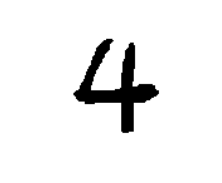

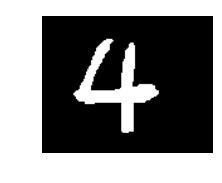

In [219]:
#imgplot = plt.imshow(img, cmap='gray')
#plt.show()
display_image_in_actual_size(img)
display_image_in_actual_size(img_inverted)

In [220]:
img_resized = resize(img_inverted, (28, 28))

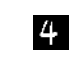

(28, 28)


In [221]:
display_image_in_actual_size(img_resized)
print(np.shape(img_resized))

In [222]:
x_img = np.reshape(img_resized, [-1, 28*28])
print(np.shape(x_img))

(1, 784)


In [223]:
actv_value = sess.run(actv, feed_dict={x : x_img})

In [224]:
# 눈으로 보기 좋게 % 값으로 보정
print(np.float32(np.int32(actv_value*1000) / 10))

array([[  0.        ,   0.60000002,   0.89999998,   0.        ,
         59.20000076,   0.1       ,  24.5       ,   0.        ,
          8.89999962,   5.5       ]], dtype=float32)

In [225]:
result = np.argmax(actv_value)
print(result)

4


### 왜 잘 안되나 MNIST train 이미지로 확인해봤더니 이미지가 반전되어 있음

In [226]:
img_train = mnist.train.images[0]

img_train = np.reshape(img_train, [28, 28])
print(np.shape(img_train))

(28, 28)


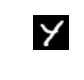

In [227]:
display_image_in_actual_size(img_train)